In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from scipy import stats

# Dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')

def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features :',len(cat_features))
data_info(data)


1) Number of columns are :  53
2) Number of rows are :  180519
3) Total number of data-points : 9567507
4) Count of Numerical Features : 31
5) Count of Categorical Features : 22


In [2]:
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')
            
features_with_missing_values(data)



Percentage of Total Missing Values is  3.51 %
Missing Value Estimation :
The Feature  Customer Lname  has 8 missing values
The Feature  Customer Zipcode  has 3 missing values
The Feature  Order Zipcode  has 155679 missing values
The Feature  Product Description  has 180519 missing values


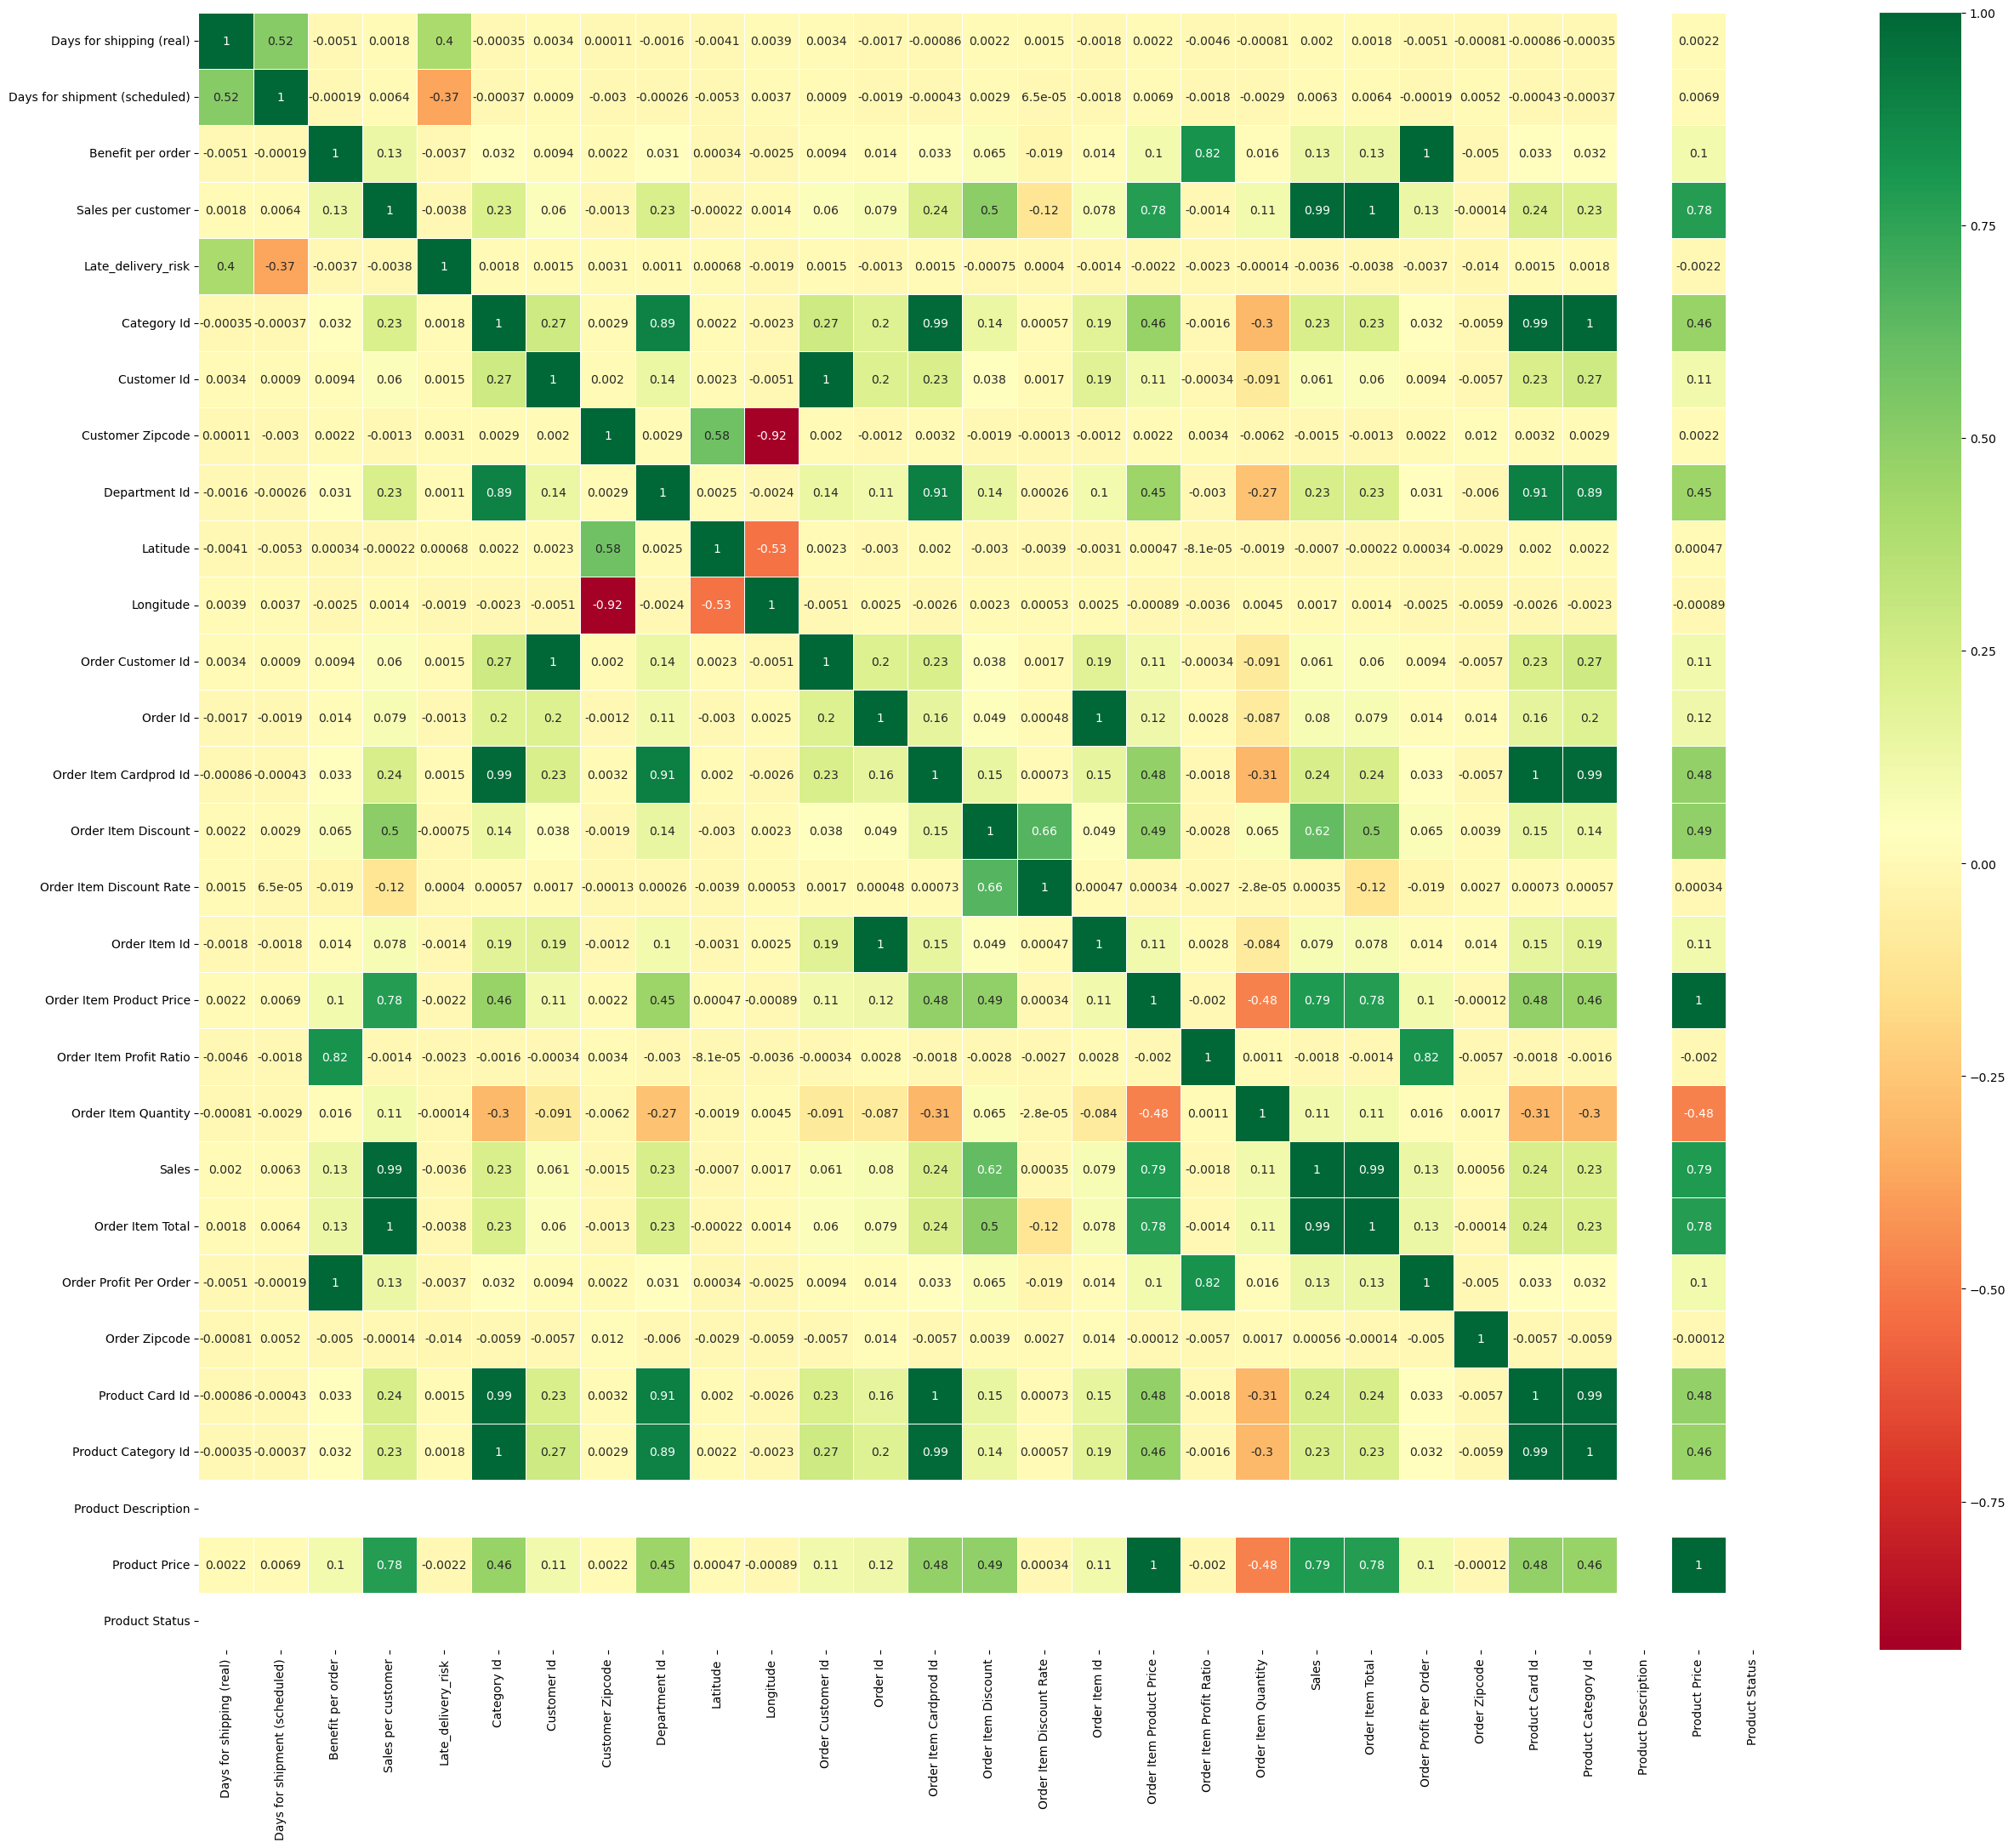

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Sales' is the target column and you want to exclude it from correlation
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_data = data[numeric_columns]

# Create a correlation matrix
corrmap = numeric_data.corr()

# Select the top correlated features for better visualization
top_corr_features = corrmap.index

# Set a smaller figure size
plt.figure(figsize=(30, 25))

# Plot the heatmap
sns.heatmap(numeric_data[top_corr_features].corr(), annot=True, cmap="RdYlGn",linewidths=.5)

# Show the plot
plt.show()


In [5]:
#Converting categorical features that represent date and time to datetime datatype.
data['order_date'] = pd.to_datetime(data['order date (DateOrders)'])

# Handling Time and date variables
data['order_year'] = pd.DatetimeIndex(data['order_date']).year
data['order_month'] = pd.DatetimeIndex(data['order_date']).month
data['order_day'] = pd.DatetimeIndex(data['order_date']).day


Mean Absolute Error: 0.0005566302801917326
Mean Squared Error: 2.275589673665956e-06
R-squared: 0.9999999998687736


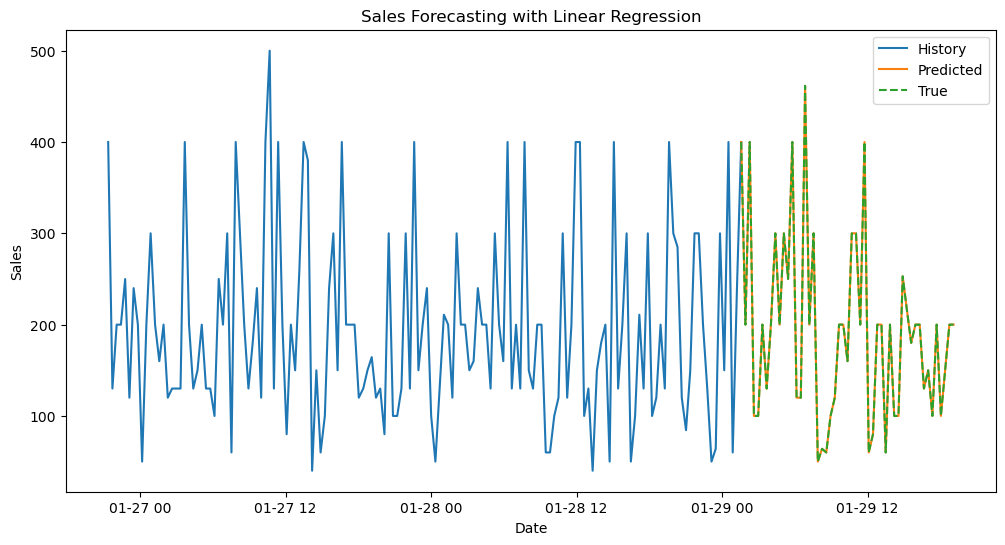

In [12]:
# Select relevant features for linear regression
linear_reg_features = ['Benefit per order', 'Sales per customer', 'Order Item Discount', 'Order Item Discount Rate',
                     'Order Item Product Price', 'Order Item Profit Ratio', 'order_year']

# Prepare Data for Linear Regression
finance = data[linear_reg_features]

# Assuming 'Sales' is the target column for forecasting
target_feature = 'Sales'
target_data = data[target_feature]

# Normalize data
scaler = StandardScaler()
finance_normalized = scaler.fit_transform(finance)

# Reshape the target data to a 1D array
target_data = target_data.values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(finance_normalized, target_data, test_size=0.2, random_state=42)

# Linear Regression for Sales Forecasting
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


# Sort the data by date
data_sorted = data.sort_values('order date (DateOrders)')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data_sorted['order date (DateOrders)'][-350:-200], y_test[-350:-200], label='History')
plt.plot(data_sorted['order date (DateOrders)'][-201:-150], y_pred_linear[-201:-150], label='Predicted')
plt.plot(data_sorted['order date (DateOrders)'][-201:-150], y_test[-201:-150], label='True', linestyle='--')

plt.title('Sales Forecasting with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

